<a href="https://colab.research.google.com/github/sekharmm/mandava_IT533/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from sklearn import linear_model  
from sklearn.linear_model import LogisticRegression 
amazon = pd.read_csv("https://raw.githubusercontent.com/sekharmm/mandava_IT533/main/amazon_toy_sample_clean.csv", encoding="ISO-8859-1") # use your own GitHub link here
amazon.dropna(inplace=True)
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression( )

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
amazon.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,status,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews
0,dafc6b4ba4b4a3e7b4ff83402a196ae8,Dinosaur Eggs,Halsall,0.29,3,new,3,2,4.0,Figures & Playsets > Dinosaurs,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,Manufacturer's Description not available,Technical Details Item Weight82 g Product Dime...,Not available,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,None,Fascinating fun // 4.0 // 25 Nov. 2008 // By\n...
1,ba85fb9368114fce646379ed12750a5f,Neopets 4 Trading Card Fun Packs (2 Bonus Cards),Neopets,0.38,2,new,2,1,4.5,Hobbies > Trading Cards & Accessories > Packs ...,Unknown,Manufacturer's Description not available,Technical Details Item Weight454 g Product Dim...,Not available,Not available,None,Never Too Old // 4.0 // 6 Nov. 2013 // By\n ...
2,14e24c29ba38c2717754baa2638f242a,"Latex Assorted Water Balloons, Pack of 40",Unique Party,0.39,7,new,2,1,4.5,Party Supplies > Decorations > Balloons,http://www.amazon.co.uk/Latex-Cannonball | htt...,Colour Name:Assorted Bold | Size Name:Pack o...,Technical Details Item Weight222 g Product Dim...,Colour Name:Assorted Bold | Size Name:Pack o...,http://www.amazon.co.uk/Water-Bombs-Pack-100-A...,None,Great item // 4.0 // 27 Dec. 2015 // By\n \...
4,7b72f597db5d74d35c4f91ef69708cf1,4 Packs of Mini Colouring Pencils (4 pencils i...,unisex party bag fillers,0.60,7,new,21,1,4.3,Arts & Crafts > Colouring Pencils,http://www.amazon.co.uk/12-Mini-Christmas-Colo...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,Technical Details Item Weight59 g Product Dime...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,http://www.amazon.co.uk/20-Packs-Wax-Crayons-P...,How many packs in the box. // I got four Mimi ...,Well made and presented // 4.0 // 6 April 2015...
5,7b8a04095b5e4984c57fd45eb327feb1,100 Deep Red Rose Silk Petals Confetti - Weddi...,Shatchi,0.64,6,new,10,2,4.1,"Party Supplies > Banners, Stickers & Confetti ...",http://www.amazon.co.uk/Valentines | http://ww...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,Technical Details Manufacturer recommended age...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,http://www.amazon.co.uk/300-Deep-Silk-Rose-Pet...,None,Five Stars // 5.0 // 2 Dec. 2015 // By\n \n...


In [ ]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression( )  #1 
# Perform binning on average_review_rating_of_5.   
bins = np.linspace(amazon.average_review_rating_of_5.min(), amazon.average_review_rating_of_5.max(), 3)  #2 
bins
# Define the two labels. 
labels = ['Low Rating', 'High Rating']  #3
# Add bins to the dataset. 
amazon['bins'] = pd.cut(amazon['average_review_rating_of_5'], bins = bins, labels = labels, include_lowest = True) #4
amazon
# amazon = amazon[['bins', 'number_of_reviews']] #5
# dfTrain = amazon[:5000]  
# dfTest = amazon[5000:]   #6 
# train_y = np.asarray(dfTrain['bins']) 
# train_x = np.asarray(dfTrain.drop(['bins'], 1)) 
# test_y = np.asarray(dfTest['bins']) 
# test_x = np.asarray(dfTest.drop(['bins'], 1))
# train_x  #7 

,uniq_id,product_name,manufacturer,price,number_available_in_stock,status,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,bins
0,dafc6b4ba4b4a3e7b4ff83402a196ae8,Dinosaur Eggs,Halsall,0.29,3,new,3,2,4.0,Figures & Playsets > Dinosaurs,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,Manufacturer's Description not available,Technical Details Item Weight82 g Product Dime...,Not available,http://www.amazon.co.uk/Hatch-em-TY63-Hatching...,None,Fascinating fun // 4.0 // 25 Nov. 2008 // By\n...,High Rating
1,ba85fb9368114fce646379ed12750a5f,Neopets 4 Trading Card Fun Packs (2 Bonus Cards),Neopets,0.38,2,new,2,1,4.5,Hobbies > Trading Cards & Accessories > Packs ...,Unknown,Manufacturer's Description not available,Technical Details Item Weight454 g Product Dim...,Not available,Not available,None,Never Too Old // 4.0 // 6 Nov. 2013 // By\n ...,High Rating
2,14e24c29ba38c2717754baa2638f242a,"Latex Assorted Water Balloons, Pack of 40",Unique Party,0.39,7,new,2,1,4.5,Party Supplies > Decorations > Balloons,http://www.amazon.co.uk/Latex-Cannonball | htt...,Colour Name:Assorted Bold | Size Name:Pack o...,Technical Details Item Weight222 g Product Dim...,Colour Name:Assorted Bold | Size Name:Pack o...,http://www.amazon.co.uk/Water-Bombs-Pack-100-A...,None,Great item // 4.0 // 27 Dec. 2015 // By\n \...,High Rating
4,7b72f597db5d74d35c4f91ef69708cf1,4 Packs of Mini Colouring Pencils (4 pencils i...,unisex party bag fillers,0.60,7,new,21,1,4.3,Arts & Crafts > Colouring Pencils,http://www.amazon.co.uk/12-Mini-Christmas-Colo...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,Technical Details Item Weight59 g Product Dime...,4 x Mini Colouring Pencils - Pack of 4 Size: 8...,http://www.amazon.co.uk/20-Packs-Wax-Crayons-P...,How many packs in the box. // I got four Mimi ...,Well made and presented // 4.0 // 6 April 2015...,High Rating
5,7b8a04095b5e4984c57fd45eb327feb1,100 Deep Red Rose Silk Petals Confetti - Weddi...,Shatchi,0.64,6,new,10,2,4.1,"Party Supplies > Banners, Stickers & Confetti ...",http://www.amazon.co.uk/Valentines | http://ww...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,Technical Details Manufacturer recommended age...,Pack of 100 Deep Red Silk Rose Petals Luxury s...,http://www.amazon.co.uk/300-Deep-Silk-Rose-Pet...,None,Five Stars // 5.0 // 2 Dec. 2015 // By\n \n...,High Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6331,8020c8cd2b86bd2e793241dd321d8921,Parrot Bebop Drone 2 (White),Parrot,439.95,11,new,9,3,3.3,Hobbies > Remote Controlled Devices > Helicopt...,http://www.amazon.co.uk/BTG-Upgrade-Battery310...,Colour Name:White and Black Product Descriptio...,Technical Details Item Weight503 g Product Dim...,Colour Name:White and Black Product Descriptio...,Not available,Can you use the skycontroller from the origina...,Much improved but slightly weird incremental u...,High Rating
6332,ddd1807f90417adcdf4cd45841239e01,Star Images E.T. Stunt Puppet Replica Action F...,Star images,447.99,3,new,1,3,5.0,Figures & Playsets > Accessories,http://www.amazon.co.uk/12-Inch-Replica-Stunt-...,Product Description E.T. Stunt Puppet Replica ...,Technical Details Item Weight998 g Product Dim...,Product Description E.T. Stunt Puppet Replica ...,http://www.amazon.co.uk/12-Inch-Replica-Stunt-...,Is this made by Neca and is it the 3 foot life...,Five Stars // 5.0 // 25 Oct. 2014 // By\n \...,High Rating
6333,1e897bf37e4e89aba7cc962f24913fd4,Indiana Jones - 12 Inch Action Figures: Indian...,Sideshow,719.95,2,new,1,1,5.0,Figures & Playsets > Science Fiction & Fantasy,http://www.amazon.co.uk/Indiana-Jones-Masterpi...,Figurine articulÃ©e taille env. 30 cm avec vÃª...,Technical Details Item Weight1.1 Kg Product Di...,Figurine articulÃ©e taille env. 30 cm avec vÃª...,Not

In [ ]:
means = np.mean(train_x, axis=0)
std = np.std(train_x, axis=0) 
train_x = (train_x - means)/std
test_x = (test_x - means)/std  #8

In [ ]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression( )
model.fit(train_x, train_y) #9

LogisticRegression()

In [ ]:
# Determine the accuracy of the model. 
accuracy = model.score(test_x, test_y)
print("accuracy = ", accuracy * 100, "%") #10

accuracy =  99.6951219512195 %


In [ ]:
amazon.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                          float64
number_available_in_stock                        int64
status                                          object
number_of_reviews                                int64
number_of_answered_questions                     int64
average_review_rating_of_5                     float64
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
dtype: object

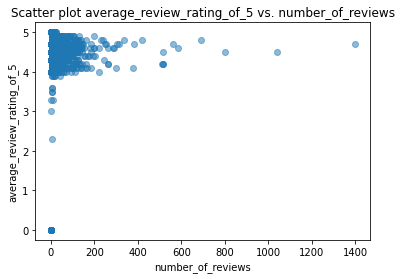

In [ ]:
plt.scatter(amazon['number_of_reviews'], amazon['average_review_rating_of_5'], alpha=0.5)
plt.title('Scatter plot average_review_rating_of_5 vs. number_of_reviews')
plt.ylabel('average_review_rating_of_5')
plt.xlabel('number_of_reviews')
plt.show()

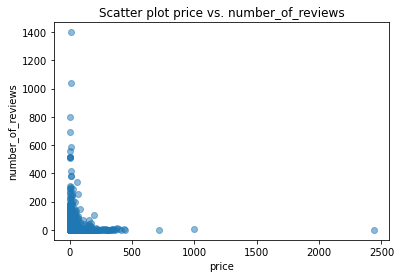

In [ ]:
plt.scatter(amazon['price'], amazon['number_of_reviews'], alpha=0.5)
plt.title('Scatter plot price vs. number_of_reviews')
plt.xlabel('price')
plt.ylabel('number_of_reviews')
plt.show()

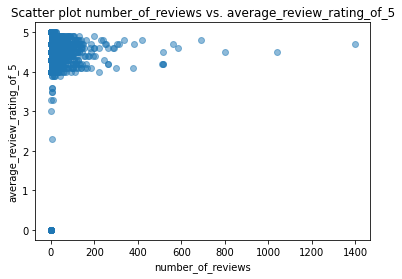

In [ ]:
plt.scatter(amazon['number_of_reviews'], amazon['average_review_rating_of_5'], alpha=0.5)
plt.title('Scatter plot number_of_reviews vs. average_review_rating_of_5')
plt.xlabel('number_of_reviews')
plt.ylabel('average_review_rating_of_5')
plt.show()

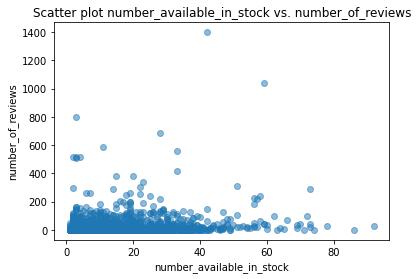

In [ ]:
plt.scatter(amazon['number_available_in_stock'], amazon['number_of_reviews'], alpha=0.5)
plt.title('Scatter plot number_available_in_stock vs. number_of_reviews')
plt.xlabel('number_available_in_stock')
plt.ylabel('number_of_reviews')
plt.show()

In [ ]:
amazon.corr()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating_of_5
price,1.000000,-0.018236,-0.024008,-0.005889,0.013213
number_available_in_stock,-0.018236,1.000000,0.215193,-0.008333,-0.009538
number_of_reviews,-0.024008,0.215193,1.000000,0.020904,-0.089078
number_of_answered_questions,-0.005889,-0.008333,0.020904,1.000000,0.001501
average_review_rating_of_5,0.013213,-0.009538,-0.089078,0.001501,1.000000


In [ ]:
X = amazon['average_review_rating_of_5']
y = amazon['number_of_reviews']
X = sm.add_constant(X)
amazon.mod1 = sm.OLS(y1, X1).fit()  ## sm.OLS(output, i.e. dependent variable, input, i.e. independent variable)
amazon.mod1_summary = amazon.mod1.summary()
print(amazon.mod1_summary)

                            OLS Regression Results                            
Dep. Variable:      number_of_reviews   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     50.47
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.34e-12
Time:                        15:43:26   Log-Likelihood:                -32092.
No. Observations:                6312   AIC:                         6.419e+04
Df Residuals:                    6310   BIC:                         6.420e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print('Parameters: ', amazon.mod1.params)
print('R2: ', amazon.mod1.rsquared)

Parameters:  const                         49.444822
average_review_rating_of_5    -8.168007
dtype: float64
R2:  0.007934822445616052


In [ ]:
predictions = amazon.mod1.predict(X) # Here, you'll see the CALCULATED values with the formula
predictions

0       16.772794
1       12.688790
2       12.688790
4       14.322392
5       15.955993
          ...    
6331    22.490399
6332     8.604787
6333     8.604787
6334     8.604787
6335    16.772794
Length: 6312, dtype: float64

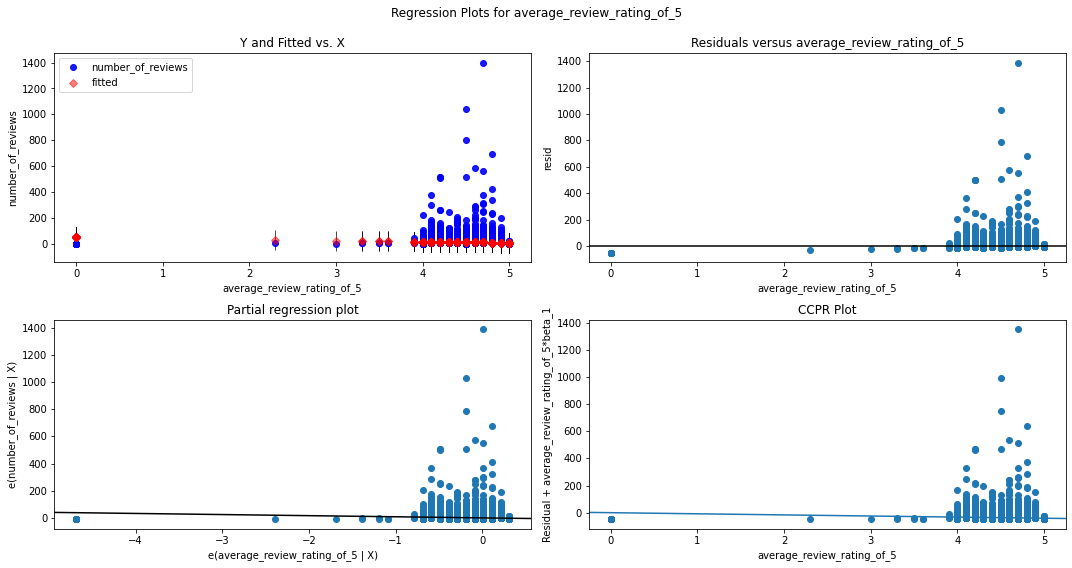

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(amazon.mod1, "average_review_rating_of_5", fig=fig)

In [ ]:
amazon.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                          float64
number_available_in_stock                        int64
status                                          object
number_of_reviews                                int64
number_of_answered_questions                     int64
average_review_rating_of_5                     float64
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
dtype: object

In [ ]:
X = amazon[['price','average_review_rating_of_5','number_available_in_stock']] # Now we have values from three different independent attributes stored in X
y = amazon['number_of_reviews'] # This is, again, our dependent attribute
print(X) # This is the content of our X variable

        price  average_review_rating_of_5  number_available_in_stock
0        0.29                         4.0                          3
1        0.38                         4.5                          2
2        0.39                         4.5                          7
4        0.60                         4.3                          7
5        0.64                         4.1                          6
...       ...                         ...                        ...
6331   439.95                         3.3                         11
6332   447.99                         5.0                          3
6333   719.95                         5.0                          2
6334   995.11                         5.0                          2
6335  2439.92                         4.0                          2

[6312 rows x 3 columns]


In [ ]:
# Defining the model for a multiple regression using the lm.fit() function:

lm = linear_model.LinearRegression() # Here, we are using the linear_model subpackage from scikit-learn that we imported above
model = lm.fit(X,y) # And here, we are building the model

In [ ]:
# To find the R-squared score:
lm.score(X,y)

0.05424149112675103

In [ ]:
# To find the coefficients for the predictors:
lm.coef_

array([-0.01604065, -7.95785033,  0.91998595])

In [ ]:
# To find the intercept:
lm.intercept_

40.745150842700085

In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 6335
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      6312 non-null   object 
 1   product_name                                 6312 non-null   object 
 2   manufacturer                                 6312 non-null   object 
 3   price                                        6312 non-null   float64
 4   number_available_in_stock                    6312 non-null   int64  
 5   status                                       6312 non-null   object 
 6   number_of_reviews                            6312 non-null   int64  
 7   number_of_answered_questions                 6312 non-null   int64  
 8   average_review_rating_of_5                   6312 non-null   float64
 9   amazon_category_and_sub_category             6312 non-null   object 
 10  

In [ ]:
X = amazon.iloc[:, :-1].values
y = amazon.iloc[:, 16].values
print(X)
print(y)

[['dafc6b4ba4b4a3e7b4ff83402a196ae8' 'Dinosaur Eggs' 'Halsall' ...
  'Not available'
  'http://www.amazon.co.uk/Hatch-em-TY63-Hatching-Dinosaur-Egg/dp/B00160C8NK | http://www.amazon.co.uk/DINOSAUR-GROWING-Only-Supplied/dp/B001AAPNVA | http://www.amazon.co.uk/Parties-Wrapped-Up-Hatching-Dinosaur/dp/B006A2R82A | http://www.amazon.co.uk/Natural-History-Museum-Dinosaur-Projector/dp/B0079FCBBK'
  'None']
 ['ba85fb9368114fce646379ed12750a5f'
  'Neopets 4 Trading Card Fun Packs (2 Bonus Cards)' 'Neopets' ...
  'Not available' 'Not available' 'None']
 ['14e24c29ba38c2717754baa2638f242a'
  'Latex Assorted Water Balloons, Pack of 40' 'Unique Party' ...
  'Colour Name:Assorted Bold \xa0|\xa0 Size Name:Pack of 40 Product Description Enjoy some wet fun in the sun with these entertaining Latex Water Balloons! Featuring an assortment of bold colours, these water bombs are great for filling with water and launching them at friends and family at a summer party or get-together. Attach the neck of each b

In [ ]:
X = amazon[['price','number_available_in_stock','number_of_reviews','number_of_answered_questions']] # Now we have values from three different independent attributes stored in X
y = amazon['average_review_rating_of_5'] # This is, again, our dependent attribute
print(X) # This is the content of our X variable
X = sm.add_constant(X)
amazon.mod1 = sm.OLS(y1, X1).fit()  ## sm.OLS(output, i.e. dependent variable, input, i.e. independent variable)
amazon.mod1_summary = amazon.mod1.summary()
print(amazon.mod1_summary)

        price  number_available_in_stock  number_of_reviews  \
0        0.29                          3                  3   
1        0.38                          2                  2   
2        0.39                          7                  2   
4        0.60                          7                 21   
5        0.64                          6                 10   
...       ...                        ...                ...   
6331   439.95                         11                  9   
6332   447.99                          3                  1   
6333   719.95                          2                  1   
6334   995.11                          2                  4   
6335  2439.92                          2                  1   

      number_of_answered_questions  
0                                2  
1                                1  
2                                1  
4                                1  
5                                2  
...                  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
